In [1]:
import os
import pandas as pd
import numpy as np

from numpy.linalg import inv
from numpy import linalg as LA
from numpy.matlib import repmat

pd.options.mode.chained_assignment = None
np.random.seed(0)

In [2]:
import sys
sys.path.append('../../Python/')
from Preprocessing import standardize, MaxMinScaler
from Evaluation import split_train_test_ma, train_model, eval_model_roc_2
from Databases import get_databases_path, get_database

In [3]:
theta = 1e-50

def sigmoid(a):
    return 1./(1 + np.exp(-a))

def grad_cost_function(w, X, Y, mui):
    R = Y.shape[1] # Number of annotators.
    D = X.shape[1] # Input space dimension
    N = X.shape[0] # Number of samples.
    
    sizew1 = D
        
    W1 = w.reshape(sizew1,1)
    pi = sigmoid(np.dot(X, W1))
    pi = repmat(pi, 1, R)
    aux = np.multiply(mui, Y) - np.multiply(mui, pi)
    aux2 = -np.sum(np.dot(X.transpose(), aux), axis=1)
    g = aux2.reshape(1, sizew1)
    return g
     
def optimizer(X, Y, w_0, mui):
    params = w_0
    epsilon = 0.001
    normGrad = 300
    i=0
    while normGrad > 0.1 and i<300:
        gr = grad_cost_function(params, X, Y, mui)
        params = params - epsilon * gr
        normGrad = LA.norm(gr)
        i+=1
    return params, normGrad
    
def traing_dgrl(X_train, y_train):
    X = X_train.copy(deep=True)
    Y = y_train.copy(deep=True)
    
    X.loc[:,'b'] = 0.0
    X = X.values
    Y = Y.values
    R = Y.shape[1] # Number of annotators.
    D = X.shape[1] # Input space dimension
    N = X.shape[0] # Number of samples.
    
    sizew1 = D
    sizew2 = R;
    sizeW = sizew1 + sizew2
    
    w = np.random.randn(1, sizeW)
    Yhat = np.array(Y.mean(axis=1)).reshape(Y.shape[0],1)
    aux = repmat(np.around(Yhat), 1, R) - Y
    mui = 1 - abs(aux)
    
    w1 = np.dot(inv(np.dot(X.T,X) + theta*np.eye(D)), np.dot(X.T,Yhat))
    w1 = w1.reshape(1, sizew1)
    w2 = mui.sum(axis=0)/N

    w_0 = w1
    loglik1 = 10000000
    difloglik = 100
    difloglik1 = -1
    i = 0
    
    while difloglik > 0.1 and i < 100:
        # M-step     
        w, _ = optimizer(X, Y, w_0, mui)
        W1 = w[0,0:sizew1].reshape(sizew1,1)
        w2 = mui.sum(axis=0)/N

        #E-step
        Yhat = sigmoid(np.dot(X, W1))
        pi = Yhat
        auxpi = repmat(pi, 1, R)
        auxpir = repmat(w2, N, 1)
        
        nummui = np.multiply(auxpir, auxpi)
        denmui = (np.multiply(auxpir, auxpi) + (1-auxpir)/2) 
        mui =  np.divide(nummui, denmui + theta)
        
        loglika = np.sum(np.multiply(np.log(auxpir), mui))
        
        auxb = np.sum(np.multiply(Y, mui), axis=1).reshape(N, 1)
        loglikb = np.sum(np.multiply(np.log(pi+theta), auxb))
        
        auxc = np.sum(np.multiply((1-Y), mui), axis=1).reshape(N, 1)
        
        loglikc = np.sum(np.multiply(np.log((1-pi)+theta), auxc))
        loglikd = np.sum(np.multiply(np.log((1-auxpir)+theta), (1-mui)))
        
        loglik2 = -(loglika + loglikb + loglikc + loglikd)
        difloglik = abs(loglik2 - loglik1);
        loglik1 = loglik2
        
        w_0 = w
        i+=1
    return w1.reshape(sizew1,1) 

------------------------------------------------------------------------
Database: ../../Databases/Sinteticas/breast-cancer 


Results

-- Global Precision --
0.6257309941520468


-- General Report --
              precision    recall  f1-score   support

         yes       0.72      0.68      0.70       108
          no       0.49      0.54      0.52        63

    accuracy                           0.63       171
   macro avg       0.60      0.61      0.61       171
weighted avg       0.63      0.63      0.63       171



-- Confusion Matrix --
    0   1
0  73  35
1  29  34

ROC Curve: 

ROC AUC:  0.5946502057613169


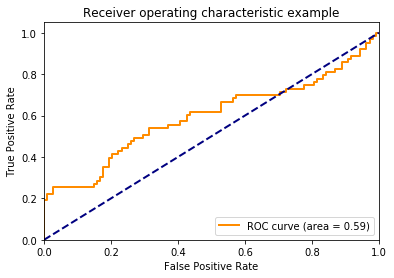

------------------------------------------------------------------------
Database: ../../Databases/Sinteticas/column 


Results

-- Global Precision --
0.6021505376344086


-- General Report --
              precision    recall  f1-score   support

         yes       0.80      0.56      0.65        63
          no       0.43      0.70      0.53        30

    accuracy                           0.60        93
   macro avg       0.61      0.63      0.59        93
weighted avg       0.68      0.60      0.61        93



-- Confusion Matrix --
    0   1
0  35  28
1   9  21

ROC Curve: 

ROC AUC:  0.6862433862433863


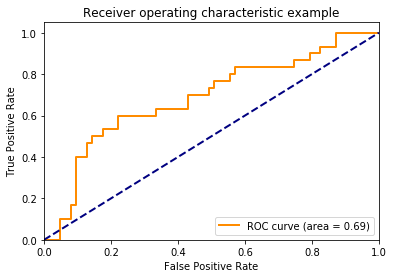

------------------------------------------------------------------------
Database: ../../Databases/Sinteticas/parkinsons 


Results

-- Global Precision --
0.6271186440677966


-- General Report --
              precision    recall  f1-score   support

         yes       0.82      0.67      0.74        46
          no       0.29      0.46      0.35        13

    accuracy                           0.63        59
   macro avg       0.55      0.57      0.55        59
weighted avg       0.70      0.63      0.65        59



-- Confusion Matrix --
    0   1
0  31  15
1   7   6

ROC Curve: 

ROC AUC:  0.6471571906354515


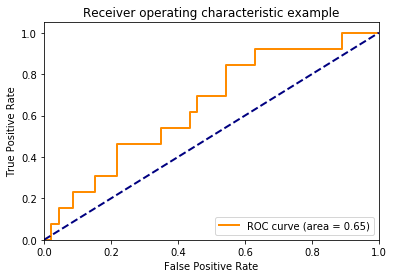

------------------------------------------------------------------------
Database: ../../Databases/Sinteticas/ionophere 


Results

-- Global Precision --
0.8476190476190476


-- General Report --
              precision    recall  f1-score   support

         yes       0.78      0.78      0.78        37
          no       0.88      0.88      0.88        68

    accuracy                           0.85       105
   macro avg       0.83      0.83      0.83       105
weighted avg       0.85      0.85      0.85       105



-- Confusion Matrix --
    0   1
0  29   8
1   8  60

ROC Curve: 

ROC AUC:  0.8616852146263911


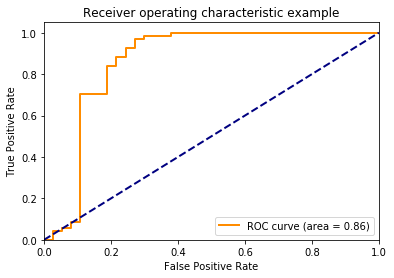

------------------------------------------------------------------------
Database: ../../Databases/Sinteticas/sentiment-polarity 


Results

-- Global Precision --
0.6


-- General Report --
              precision    recall  f1-score   support

         yes       0.55      0.65      0.60        48
          no       0.65      0.56      0.60        57

    accuracy                           0.60       105
   macro avg       0.60      0.60      0.60       105
weighted avg       0.61      0.60      0.60       105



-- Confusion Matrix --
    0   1
0  31  17
1  25  32

ROC Curve: 

ROC AUC:  0.6388888888888888


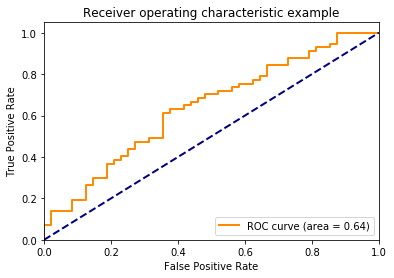

In [4]:
databases_path = '../../Databases/Sinteticas'
paths = get_databases_path(databases_path)

for database in paths:
    print('------------------------------------------------------------------------')
    print("Database:", database, '\n')

    # Obtain the attributes and labels
    attr_df = get_database(database, 'database_attr.csv')
    labels_df = get_database(database, 'database_labels.csv')  

    # Preprocessing the attributes
    attr_df = standardize(attr_df)

    # Split in Training and Test Sets
    X_train, X_test, y_train, y_test = split_train_test_ma(attr_df, labels_df)

    # Train DGLR Model
    W = traing_dgrl(X_train, y_train)

    X_test.loc[:, ('b')] = 0
    predtest = sigmoid(np.dot(X_test,W))
    y_pred = np.round(predtest).astype(bool)

    print("\nResults\n")
    eval_model_roc_2(y_test, y_pred, predtest)